## The Problem Statement

**Year 2021**
- I am new to the stock market as of 2021 and I want to understand the behaviour of NIFTY
- Especially the historical behaviour of how Nifty behaves with changes in certain factors
- I have also collected the macro-economic data, to see how the at the broader level things have worked over these 21 years
- Having a quaterly macro-ecomonic data would have been better, but I was not able find one
- **The entire notebook is a hit & trail with sole purpose to understand the behaviour and develop my own insights about Nifty**

**Update 2022**
- I have studied Time Series Analysis to some extent and I want to test things out in this dataset

### Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x) # Set decimal points

import numpy as np
import matplotlib.pyplot as plt

import datetime
import seaborn as sns

import scipy.stats
import pylab

import statsmodels

import warnings
warnings.simplefilter(action='ignore')

### Reading Files

In [2]:
nifty = pd.read_excel("NIFTY.xlsx")
macro = pd.read_csv("MacroData_21Years.csv")

### Quick Look and Preprocessing of Data received

In [3]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
0,1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585,807.2600,11.6200,2.0700,1.8300
1,1999-01-04,896.4000,905.4500,895.7500,897.8000,32224833,811.3900,11.7200,2.0800,1.8100
2,1999-01-05,901.0000,907.2000,893.1500,907.2000,36723940,876.4100,11.8400,2.1100,1.7900
3,1999-01-06,923.3000,930.5500,915.6500,928.2500,43232321,1149.1300,12.1100,2.1600,1.7500
4,1999-01-07,932.9500,961.1500,932.9500,954.7000,65480034,1426.6800,12.4600,2.2200,1.7100


In [4]:
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
5223,2019-12-24,12269.2500,12283.7000,12202.1000,12214.5500,470290298,13864.5600,28.4700,3.7700,1.2200
5224,2019-12-26,12211.8500,12221.5500,12118.8500,12126.5500,520326632,16362.3100,28.2600,3.7400,1.2300
5225,2019-12-27,12172.9000,12258.4500,12157.9000,12245.8000,383788556,13676.2000,28.4800,3.7800,1.2300
5226,2019-12-30,12274.9000,12286.4500,12213.8000,12255.8500,411084614,14556.7300,28.5000,3.7800,1.2300
5227,2019-12-31,12247.1000,12247.1000,12151.8000,12168.4500,426931711,14812.8900,28.3000,3.7500,1.2400


In [5]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5228 non-null   datetime64[ns]
 1   Open               5228 non-null   float64       
 2   High               5228 non-null   float64       
 3   Low                5228 non-null   float64       
 4   Close              5228 non-null   float64       
 5   Shares Traded      5228 non-null   int64         
 6   Turnover (Rs. Cr)  5228 non-null   float64       
 7   P/E                5228 non-null   float64       
 8   P/B                5228 non-null   float64       
 9   Div Yield          5228 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 408.6 KB


<p style="color:#FF4500; font-size:16px"> - The nifty data starts at 01-01-1999 and ends at 31-12-2019.<br>
- It has no null values and Date attribute is already datetimeseries type </p>

In [6]:
nifty.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
count,5228.0000,5228.0000,5228.0000,5228.0000,5228.0000,5228.0000,5228.0000,5228.0000,5228.0000
mean,4930.7931,4963.9338,4892.0550,4928.5867,151535932.0130,6248.5935,19.8797,3.5388,1.4193
std,3247.0245,3255.7506,3231.0248,3243.3277,119104573.2606,4840.0158,4.1598,0.7981,0.4002
min,853.0000,877.0000,849.9500,854.2000,1394931.0000,40.1200,10.6800,1.9200,0.5900
25%,1668.0500,1691.2500,1645.9000,1670.0625,69193053.5000,2618.9875,17.0000,3.0200,1.1600
50%,4877.5000,4930.0750,4832.7000,4874.4750,130586237.0000,5461.7600,19.9300,3.4700,1.3250
75%,7587.9125,7634.4625,7531.8125,7571.9875,190082295.0000,8147.8000,22.6525,3.8000,1.5400
max,12274.9000,12293.9000,12252.7500,12271.8000,1414837250.0000,54081.5300,29.9000,6.5500,3.1800


In [7]:
macro.head()

,Year,GNI per Capita USD at year end,% Change in GNI per capita in the year,USD INR Rate at year end,% Change in USD INR rate in the year,Inflation rate at year end,Value of 1 Rs.,% GDP growth rate,Unemployment Rate %,Change in Unemployment
0,1999,440.0000,7.3200,43.0600,4.3600,4.6700,1.0000,8.8500,5.6900,0.0500
1,2000,440.0000,0.0000,44.9400,4.3700,4.0100,1.0400,3.8400,5.6600,-0.0200
2,2001,450.0000,2.2700,47.1900,5.0100,3.7800,1.0800,4.8200,5.6600,0.0000
3,2002,460.0000,2.2200,48.6100,3.0100,4.3000,1.1300,3.8000,5.7200,0.0600
4,2003,520.0000,13.0400,46.5800,-4.1800,3.8100,1.1700,7.8600,5.7300,0.0100


In [8]:
macro.tail()

,Year,GNI per Capita USD at year end,% Change in GNI per capita in the year,USD INR Rate at year end,% Change in USD INR rate in the year,Inflation rate at year end,Value of 1 Rs.,% GDP growth rate,Unemployment Rate %,Change in Unemployment
16,2015,1600.0000,2.5600,62.9700,1.0300,5.8700,2.8400,8.0000,5.5700,-0.0400
17,2016,1680.0000,5.0000,66.4600,5.5400,4.9400,2.9800,8.2600,5.5100,-0.0500
18,2017,1830.0000,8.9300,67.7900,2.0000,2.4900,3.0600,7.0400,5.4200,-0.0900
19,2018,2010.0000,9.8400,70.0900,3.3900,4.8600,3.2100,6.1200,5.3300,-0.0900
20,2019,2120.0000,5.4700,70.3900,0.4300,7.6600,3.4500,4.1800,5.3600,0.0300


In [9]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    21 non-null     int64  
 1   GNI per Capita USD at year end          21 non-null     float64
 2   % Change in GNI per capita in the year  21 non-null     float64
 3   USD INR Rate at year end                21 non-null     float64
 4   % Change in USD INR rate in the year    21 non-null     float64
 5   Inflation rate at year end              21 non-null     float64
 6   Value of 1 Rs.                          21 non-null     float64
 7   % GDP growth rate                       21 non-null     float64
 8   Unemployment Rate %                     21 non-null     float64
 9   Change in Unemployment                  21 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.8 KB


<p style="color:#FF4500; font-size:16px"> - The macro data is yearly data of macro factors from 1999 to 2019. <br>
- It has no null values.</p>

In [10]:
macro.describe()

,Year,GNI per Capita USD at year end,% Change in GNI per capita in the year,USD INR Rate at year end,% Change in USD INR rate in the year,Inflation rate at year end,Value of 1 Rs.,% GDP growth rate,Unemployment Rate %,Change in Unemployment
count,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000
mean,2009.0000,1134.7619,8.2505,52.4200,2.7195,6.3443,1.9490,6.5848,5.5595,-0.0124
std,6.2048,554.5865,5.0677,9.9545,5.5579,2.7401,0.8248,1.7941,0.1421,0.0914
min,1999.0000,440.0000,0.0000,41.3500,-8.7400,2.4900,1.0000,3.0900,5.2800,-0.1500
25%,2004.0000,610.0000,2.7000,45.3100,0.4300,4.2500,1.2100,5.2400,5.4500,-0.0600
50%,2009.0000,1120.0000,8.9300,47.1900,3.0100,5.8000,1.7100,7.4100,5.6100,-0.0200
75%,2014.0000,1560.0000,11.4800,62.3300,5.2200,8.3500,2.6900,7.9200,5.6600,0.0200
max,2019.0000,2120.0000,17.3100,70.3900,14.5100,11.9900,3.4500,8.8500,5.7300,0.2900


In [11]:
# macro.set_index('Year', inplace=True) # Setting Year column of macro as index

In [12]:
nifty.set_index('Date', inplace=True) # Setting Date column of nifty as index; Date is already datetime type

In [13]:
for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    print(i, (nifty.index.day_name() == i).sum())

Monday 1041
Tuesday 1043
Wednesday 1045
Thursday 1043
Friday 1029
Saturday 22
Sunday 5


<p style="color:#FF4500; font-size:16px">- Whats interesting to note is that there are <strong>22 Saturdays</strong> and 
    <strong>5 Sundays</strong> when the market was probably open.<br> 
    - This maybe because of special trading session. I am not sure about this</p>

In [14]:
nifty = nifty.asfreq('B') # Setting frequency of our nifty data as business days (Monday to Friday)

In [15]:
for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    print(i, (nifty.index.day_name() == i).sum())

Monday 1096
Tuesday 1096
Wednesday 1095
Thursday 1095
Friday 1096
Saturday 0
Sunday 0


In [16]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5478 entries, 1999-01-01 to 2019-12-31
Freq: B
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               5201 non-null   float64
 1   High               5201 non-null   float64
 2   Low                5201 non-null   float64
 3   Close              5201 non-null   float64
 4   Shares Traded      5201 non-null   float64
 5   Turnover (Rs. Cr)  5201 non-null   float64
 6   P/E                5201 non-null   float64
 7   P/B                5201 non-null   float64
 8   Div Yield          5201 non-null   float64
dtypes: float64(9)
memory usage: 428.0 KB


In [17]:
nifty.isna().sum()

Open                 277
High                 277
Low                  277
Close                277
Shares Traded        277
Turnover (Rs. Cr)    277
P/E                  277
P/B                  277
Div Yield            277
dtype: int64

<p style="color:#FF4500; font-size:16px">- Now after setting frequency of data to Business Days we are having <strong>277 NaN values</strong>.<br>
- This maybe because of holiday on the business day. </p>

In [18]:
nifty.head(20)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
Date,,,,,,,,,
1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
1999-01-04,896.4000,905.4500,895.7500,897.8000,32224833.0000,811.3900,11.7200,2.0800,1.8100
1999-01-05,901.0000,907.2000,893.1500,907.2000,36723940.0000,876.4100,11.8400,2.1100,1.7900
1999-01-06,923.3000,930.5500,915.6500,928.2500,43232321.0000,1149.1300,12.1100,2.1600,1.7500
1999-01-07,932.9500,961.1500,932.9500,954.7000,65480034.0000,1426.6800,12.4600,2.2200,1.7100
1999-01-08,969.9500,990.0500,966.4000,990.0500,65940665.0000,1494.3000,12.9200,2.3000,1.6400
1999-01-11,1005.1500,1016.3000,985.6000,985.6000,68195393.0000,1771.6200,12.8600,2.2900,1.6500
1999-01-12,976.7000,985.5500,953.9000,964.4500,48161247.0000,1209.2200,12.5900,2.2400,1.6900
1999-01-13,980.3000,986.2500,958.0500,961.2000,47242946.0000,1151.3000,12.5400,2.2300,1.6900


<p style="color:#FF4500; font-size:16px">- There should be 5478-5228 = 250 values that should be NaN in each column 
        but there are 277 NaN.<br>
    - We are off by 277-250 = 27 days which are the Saturday and Sunday of our data.<br>
   - Those 27 days can be afforded to be dropped as we have sufficient data after that as well and those were maybe Special trading
    days.</p>

In [19]:
nifty.columns

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)',
       'P/E', 'P/B', 'Div Yield'],
      dtype='object')

In [20]:
# Filling the NaN values by average values of the adjacent two days.

for i in ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)','P/E', 'P/B', 'Div Yield']:
    nifty[i] = ((nifty[i].ffill() + nifty[i].bfill())/2).round(decimals=2)
    if i == 'Shares Traded':
        nifty[i] = ((nifty[i].ffill() + nifty[i].bfill())/2).round(decimals=0)   # Shares Traded can't have decimals.

In [21]:
nifty.head(20)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
Date,,,,,,,,,
1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
1999-01-04,896.4000,905.4500,895.7500,897.8000,32224833.0000,811.3900,11.7200,2.0800,1.8100
1999-01-05,901.0000,907.2000,893.1500,907.2000,36723940.0000,876.4100,11.8400,2.1100,1.7900
1999-01-06,923.3000,930.5500,915.6500,928.2500,43232321.0000,1149.1300,12.1100,2.1600,1.7500
1999-01-07,932.9500,961.1500,932.9500,954.7000,65480034.0000,1426.6800,12.4600,2.2200,1.7100
1999-01-08,969.9500,990.0500,966.4000,990.0500,65940665.0000,1494.3000,12.9200,2.3000,1.6400
1999-01-11,1005.1500,1016.3000,985.6000,985.6000,68195393.0000,1771.6200,12.8600,2.2900,1.6500
1999-01-12,976.7000,985.5500,953.9000,964.4500,48161247.0000,1209.2200,12.5900,2.2400,1.6900
1999-01-13,980.3000,986.2500,958.0500,961.2000,47242946.0000,1151.3000,12.5400,2.2300,1.6900


In [22]:
nifty.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
P/E                  0
P/B                  0
Div Yield            0
dtype: int64

In [23]:
# nifty.describe().round(decimals=2)

In [24]:
# macro.describe().round(decimals=2)

In [25]:
niftyData = nifty.copy()
niftyData.reset_index(drop=False, inplace=True)

In [26]:
niftyData.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
0,1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
1,1999-01-04,896.4000,905.4500,895.7500,897.8000,32224833.0000,811.3900,11.7200,2.0800,1.8100
2,1999-01-05,901.0000,907.2000,893.1500,907.2000,36723940.0000,876.4100,11.8400,2.1100,1.7900
3,1999-01-06,923.3000,930.5500,915.6500,928.2500,43232321.0000,1149.1300,12.1100,2.1600,1.7500
4,1999-01-07,932.9500,961.1500,932.9500,954.7000,65480034.0000,1426.6800,12.4600,2.2200,1.7100


In [27]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
Date,,,,,,,,,
1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
1999-01-04,896.4000,905.4500,895.7500,897.8000,32224833.0000,811.3900,11.7200,2.0800,1.8100
1999-01-05,901.0000,907.2000,893.1500,907.2000,36723940.0000,876.4100,11.8400,2.1100,1.7900
1999-01-06,923.3000,930.5500,915.6500,928.2500,43232321.0000,1149.1300,12.1100,2.1600,1.7500
1999-01-07,932.9500,961.1500,932.9500,954.7000,65480034.0000,1426.6800,12.4600,2.2200,1.7100


<p style="color:#FF4500; font-size:16px"> - Now our data is processed, having values for all business days <br>
        - <strong>"nifty"</strong> dataframe will be used for time series analysis <br>
        - <strong>"niftyData"</strong> dataframe will be used for other data analysis</p>

In [28]:
# This code segment generates list of index of all start and end dates (Working Days) of a year

index = -1
ls = [0]
current_year = 1999

for i in niftyData['Date']:
    index = index+1
    ongoing_year =i.year
    if ongoing_year == current_year+1:
        ls.append(index-1)
        current_year = ongoing_year
        ls.append(index)


ls.append(index)        
print('These are the index of start and end date of each year')
print(ls)

These are the index of start and end date of each year
[0, 260, 261, 520, 521, 781, 782, 1042, 1043, 1303, 1304, 1565, 1566, 1825, 1826, 2085, 2086, 2346, 2347, 2608, 2609, 2869, 2870, 3130, 3131, 3390, 3391, 3651, 3652, 3912, 3913, 4173, 4174, 4434, 4435, 4695, 4696, 4955, 4956, 5216, 5217, 5477]


In [29]:
yearlyNifty = niftyData.loc[ls] # Extracting only those rows from our data

In [30]:
yearlyNifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
0,1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
260,1999-12-31,1485.6800,1548.9300,1479.4500,1536.3200,20032902.0000,897.5800,25.0000,4.4600,0.9800
261,2000-01-03,1482.1500,1592.9000,1482.1500,1592.2000,25358322.0000,884.1500,25.9100,4.6300,0.9500
520,2000-12-29,1249.0000,1265.9000,1242.2500,1263.5500,68269636.0000,2582.9000,19.2000,4.1400,1.2400
521,2001-01-01,1263.5000,1276.1500,1250.6500,1254.3000,60533274.0000,2054.0400,19.0600,4.1100,1.2500


In [31]:
# We have to reset the index for this new dataframe
yearlyNifty.reset_index(drop=True, inplace=True)
yearlyNifty.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
0,1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
1,1999-12-31,1485.6800,1548.9300,1479.4500,1536.3200,20032902.0000,897.5800,25.0000,4.4600,0.9800
2,2000-01-03,1482.1500,1592.9000,1482.1500,1592.2000,25358322.0000,884.1500,25.9100,4.6300,0.9500
3,2000-12-29,1249.0000,1265.9000,1242.2500,1263.5500,68269636.0000,2582.9000,19.2000,4.1400,1.2400
4,2001-01-01,1263.5000,1276.1500,1250.6500,1254.3000,60533274.0000,2054.0400,19.0600,4.1100,1.2500
5,2001-12-31,1033.9000,1062.3000,1033.9000,1059.0500,53151737.0000,1410.9800,15.3500,2.3800,1.4800
6,2002-01-01,1058.8500,1071.1500,1052.0500,1055.3000,43951938.0000,1316.2500,15.2900,2.3900,1.4700
7,2002-12-31,1091.8500,1100.1000,1091.7000,1093.5000,46467775.0000,1580.7500,14.8300,2.3900,2.4000
8,2003-01-01,1093.6000,1102.1000,1093.6000,1100.1500,38958168.0000,1325.9000,14.9200,2.4100,2.3800
9,2003-12-31,1868.9000,1895.6500,1852.5000,1879.7500,114764846.0000,3497.2500,20.7300,4.0500,1.4700


<p style="color:#FF4500; font-size:16px"> - <strong>yearlyNifty</strong> is the data that has the staring and the last date data values. <br>
</p> 

## Graphical Analysis

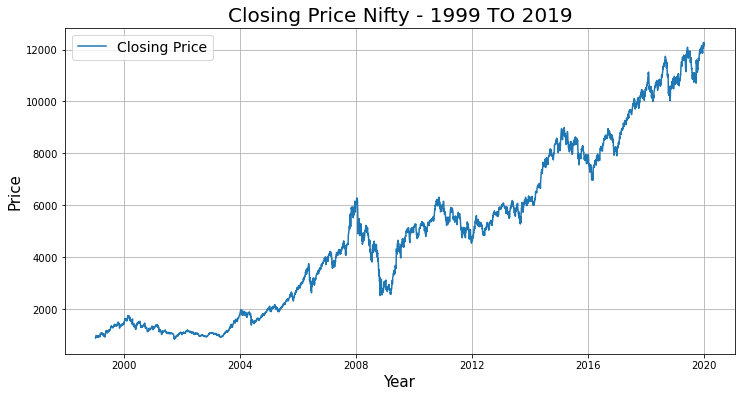

In [32]:
plt.plot(niftyData['Date'], niftyData['Close'], label='Closing Price')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.legend(prop={'size':14})
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Closing Price Nifty - 1999 TO 2019', fontsize=20)
plt.grid()
plt.show()

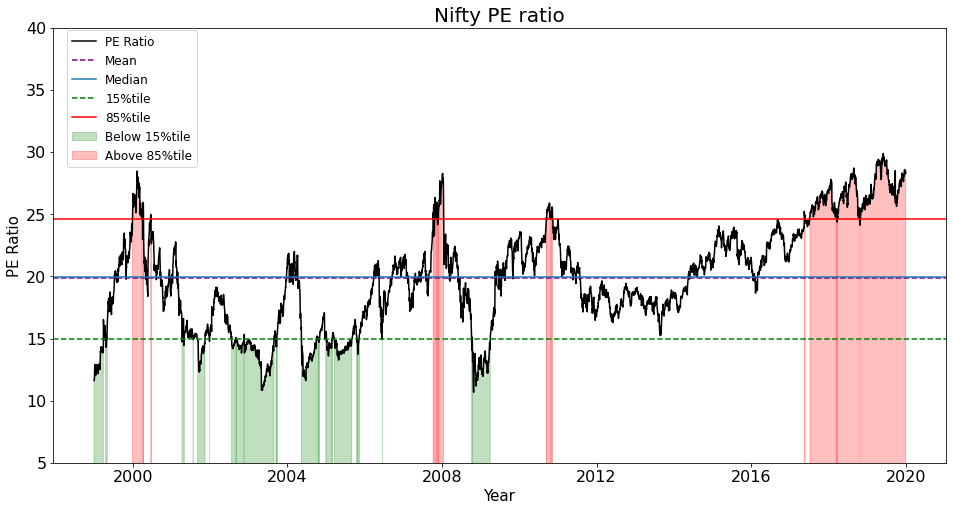

In [33]:
mean = nifty['P/E'].mean()
median = nifty['P/E'].median()
q1 = nifty['P/E'].quantile(0.15)
q3 = nifty['P/E'].quantile(0.85)


plt.plot(niftyData['Date'], niftyData['P/E'], label='PE Ratio', color='black')
plt.ylim(5, 40)
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.axhline(mean, label='Mean', linestyle='--', color='Purple')
plt.axhline(median, label='Median')
plt.axhline(q1, label='15%tile', linestyle='--', color='green')
plt.axhline(q3, label='85%tile', color='red')
plt.fill_between(niftyData['Date'], niftyData['P/E'], where=(niftyData['P/E'] < q1), alpha=0.25, label='Below 15%tile', color='green')
plt.fill_between(niftyData['Date'], niftyData['P/E'], where=(niftyData['P/E'] > q3), alpha=0.25, label='Above 85%tile', color='red')

plt.legend(loc=(.015,0.68), prop={'size':12})
plt.xlabel('Year', fontsize=15)
plt.ylabel('PE Ratio', fontsize=15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Nifty PE ratio', fontsize=20)
plt.show()

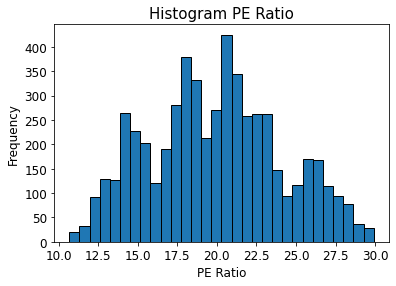

In [34]:
#bins = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

plt.hist(nifty['P/E'], bins=30, edgecolor='black')
plt.title('Histogram PE Ratio', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('PE Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

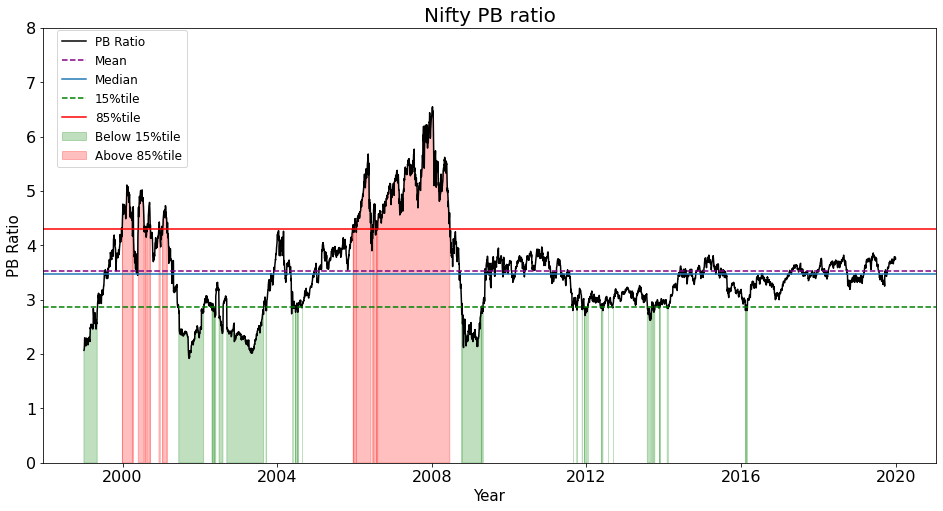

In [35]:
mean = nifty['P/B'].mean()
median = nifty['P/B'].median()
q1 = nifty['P/B'].quantile(0.15)
q3 = nifty['P/B'].quantile(0.85)

plt.plot(niftyData['Date'], niftyData['P/B'], label='PB Ratio', color='black')
plt.ylim(0, 8)
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.axhline(mean, label='Mean', linestyle='--', color='Purple')
plt.axhline(median, label='Median')
plt.axhline(q1, label='15%tile', linestyle='--', color='green')
plt.axhline(q3, label='85%tile', color='red')
plt.fill_between(niftyData['Date'], niftyData['P/B'], where=(niftyData['P/B'] < q1), alpha=0.25, label='Below 15%tile', color='green')
plt.fill_between(niftyData['Date'], niftyData['P/B'], where=(niftyData['P/B'] > q3), alpha=0.25, label='Above 85%tile', color='red')


plt.legend(loc=(.015,0.68), prop={'size':12})
plt.xlabel('Year', fontsize=15)
plt.ylabel('PB Ratio', fontsize=15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Nifty PB ratio', fontsize=20)
plt.show()

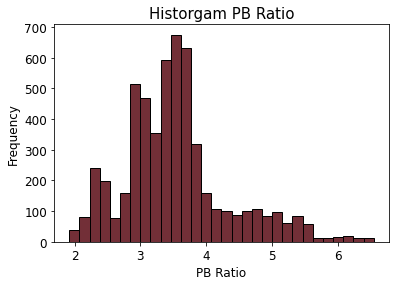

In [36]:
#bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]

plt.hist(nifty['P/B'], bins=30,color='#722F37', edgecolor='black')
plt.title('Historgam PB Ratio', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('PB Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

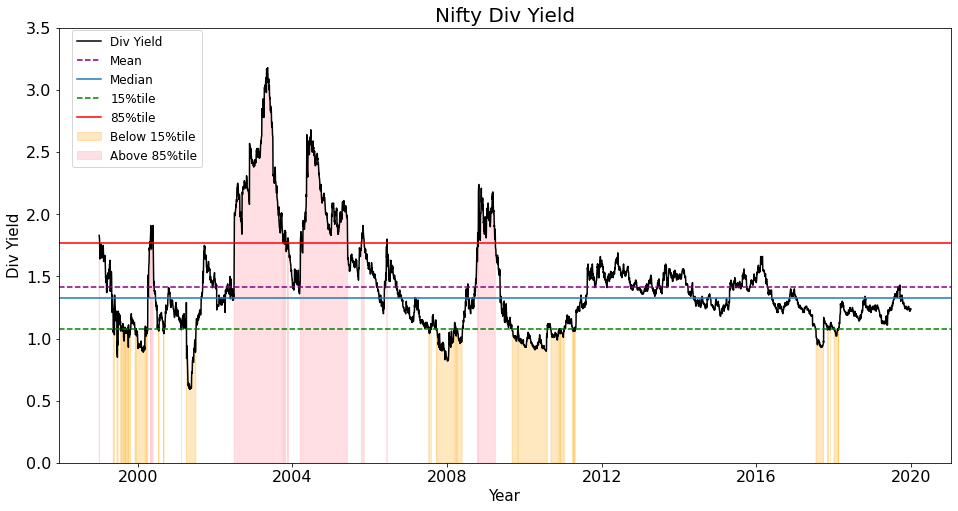

In [37]:
mean = nifty['Div Yield'].mean()
median = nifty['Div Yield'].median()
q1 = nifty['Div Yield'].quantile(0.15)
q3 = nifty['Div Yield'].quantile(0.85)

plt.plot(niftyData['Date'], niftyData['Div Yield'], label='Div Yield', color='black')
plt.ylim(0, 3.5)
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.axhline(mean, label='Mean', linestyle='--', color='Purple')
plt.axhline(median, label='Median')
plt.axhline(q1, label='15%tile', linestyle='--', color='green')
plt.axhline(q3, label='85%tile', color='red')
plt.fill_between(niftyData['Date'], niftyData['Div Yield'], where=(niftyData['Div Yield'] < q1), alpha=0.25, label='Below 15%tile', color='orange')
plt.fill_between(niftyData['Date'], niftyData['Div Yield'], where=(niftyData['Div Yield'] > q3), alpha=0.5, label='Above 85%tile', color='pink')


plt.legend(loc=(.015,0.68), prop={'size':12})
plt.xlabel('Year', fontsize=15)
plt.ylabel('Div Yield', fontsize=15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Nifty Div Yield', fontsize=20)
plt.show()

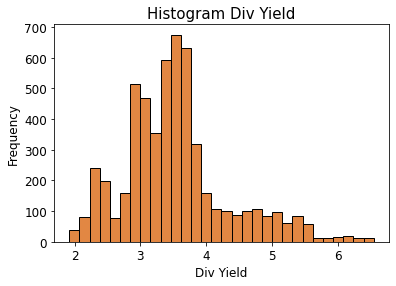

In [38]:
#bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5]

plt.hist(nifty['P/B'], bins=30, color='#e28743', edgecolor='black')
plt.title('Histogram Div Yield', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Div Yield', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [39]:
df = pd.DataFrame()

min_pe = nifty['P/E'].min()
max_pe = nifty['P/E'].max()
range_pe = max_pe - min_pe
df['normalized_PE'] = (nifty['P/E']- min_pe)/range_pe

min_pb = nifty['P/B'].min()
max_pb = nifty['P/B'].max()
range_pb = max_pb - min_pb
df['normalized_PB'] = (nifty['P/B']- min_pb)/range_pb

min_close = nifty['Close'].min()
max_close = nifty['Close'].max()
range_close = max_close - min_close
df['normalized_Close'] = (nifty['Close'] - min_close)/range_close

min_divYield = nifty['Div Yield'].min()
max_divYield = nifty['Div Yield'].max()
range_divYield = max_divYield - min_divYield
df['normalized_divYield'] = (nifty['Div Yield'] - min_divYield)/range_divYield

In [40]:
df.head()

,normalized_PE,normalized_PB,normalized_Close,normalized_divYield
Date,,,,
1999-01-01,0.0489,0.0324,0.0032,0.4788
1999-01-04,0.0541,0.0346,0.0038,0.4710
1999-01-05,0.0604,0.0410,0.0046,0.4633
1999-01-06,0.0744,0.0518,0.0065,0.4479
1999-01-07,0.0926,0.0648,0.0088,0.4324


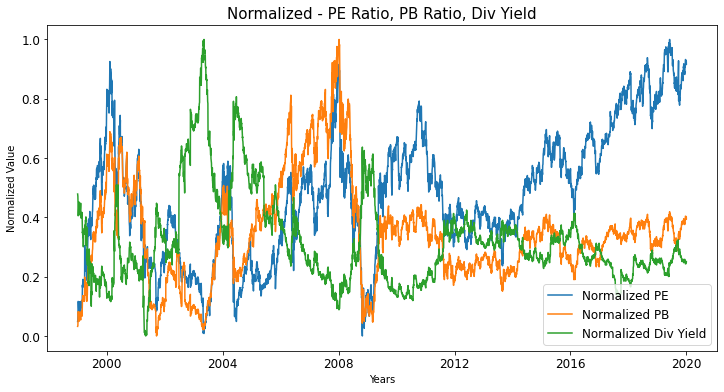

In [41]:
plt.plot(df['normalized_PE'], label='Normalized PE')
plt.plot(df['normalized_PB'], label='Normalized PB')
#plt.plot(df['normalized_Close'], label='Normalized Close')
plt.plot(df['normalized_divYield'], label='Normalized Div Yield')

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.legend(prop={'size':12})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Normalized - PE Ratio, PB Ratio, Div Yield', fontsize=15)
plt.ylabel('Normalized Value', fontsize=10)
plt.xlabel('Years', fontsize=10)
plt.show()

In [42]:
df = pd.DataFrame()

start_pe = nifty['P/E'][0]
df['scaled_PE'] = (nifty['P/E']/start_pe)

start_pb = nifty['P/B'][0]
df['scaled_PB'] = (nifty['P/B']/start_pb)

start_close = nifty['Close'][0]
df['scaled_Close'] = (nifty['Close']/start_close)

start_divYield = nifty['Div Yield'][0]
df['scaled_divYield'] = (nifty['Div Yield']/start_divYield)

In [43]:
df.head()

,scaled_PE,scaled_PB,scaled_Close,scaled_divYield
Date,,,,
1999-01-01,1.0000,1.0000,1.0000,1.0000
1999-01-04,1.0086,1.0048,1.0079,0.9891
1999-01-05,1.0189,1.0193,1.0184,0.9781
1999-01-06,1.0422,1.0435,1.0420,0.9563
1999-01-07,1.0723,1.0725,1.0717,0.9344


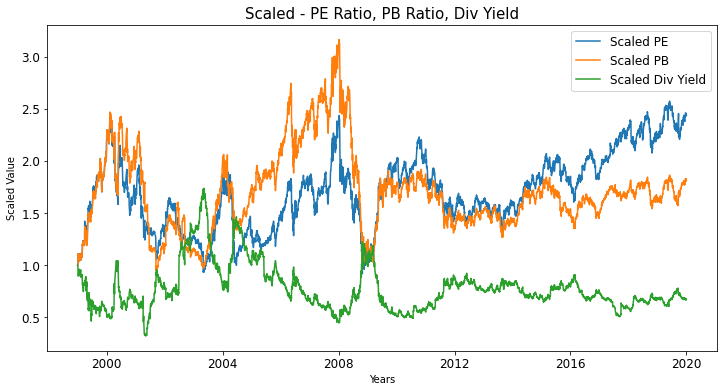

In [44]:
plt.plot(df['scaled_PE'], label='Scaled PE')
plt.plot(df['scaled_PB'], label='Scaled PB')
#plt.plot(df['scaled_Close'], label='Scaled Close')
plt.plot(df['scaled_divYield'], label='Scaled Div Yield')

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.legend(prop={'size':12})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Scaled - PE Ratio, PB Ratio, Div Yield', fontsize=15)
plt.ylabel('Scaled Value', fontsize=10)
plt.xlabel('Years', fontsize=10)
plt.show()

In [45]:
daily_return_percent = []

for i in range(0, len(nifty.index)):
    daily_return_percent.append(((nifty['Close'].iloc[i] - nifty['Open'].iloc[i])/nifty['Open'].iloc[i])*100)
    

nifty['return%'] = daily_return_percent

In [46]:
daily_log_return_percent = []

for i in range(0, len(nifty.index)):
    daily_log_return_percent.append(np.log(nifty['Close'].iloc[i]/nifty['Open'].iloc[i])*100)
    

nifty['log-return'] = daily_log_return_percent

In [47]:
percentage_change = [np.nan]
for i in range(1, len(nifty.index)):
    percentage_change.append(((nifty['Close'].iloc[i]-nifty['Close'].iloc[i-1])/nifty['Close'].iloc[i-1])*100)
    

nifty['percentage_change'] = percentage_change

In [48]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield,return%,log-return,percentage_change
Date,,,,,,,,,,,,
1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300,0.4567,0.4557,NaN
1999-01-04,896.4000,905.4500,895.7500,897.8000,32224833.0000,811.3900,11.7200,2.0800,1.8100,0.1562,0.1561,0.7858
1999-01-05,901.0000,907.2000,893.1500,907.2000,36723940.0000,876.4100,11.8400,2.1100,1.7900,0.6881,0.6858,1.0470
1999-01-06,923.3000,930.5500,915.6500,928.2500,43232321.0000,1149.1300,12.1100,2.1600,1.7500,0.5361,0.5347,2.3203
1999-01-07,932.9500,961.1500,932.9500,954.7000,65480034.0000,1426.6800,12.4600,2.2200,1.7100,2.3313,2.3046,2.8494


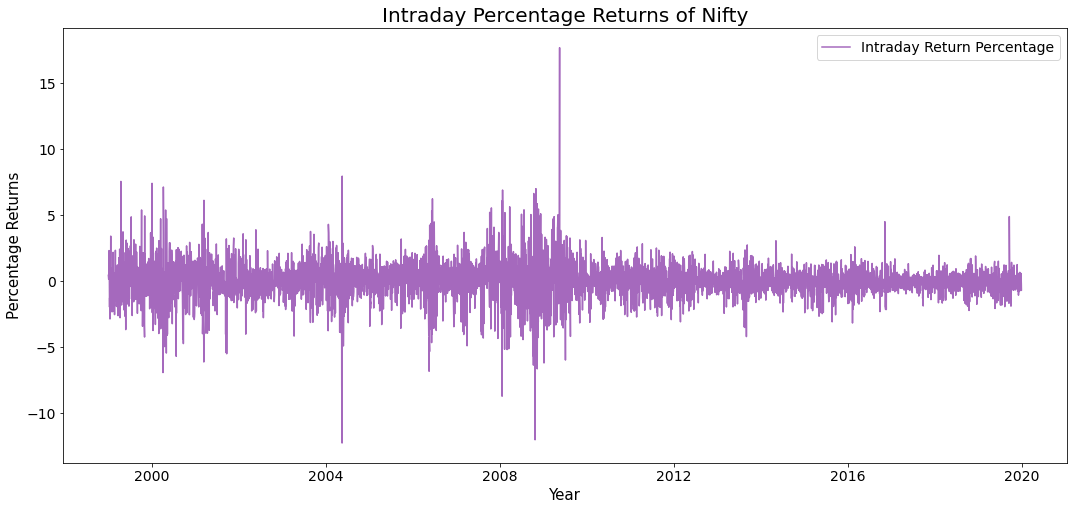

In [49]:
plt.plot(nifty['return%'], label='Intraday Return Percentage', color='#A569BD')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.legend(prop={'size':14})
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Percentage Returns", fontsize=15)
plt.title('Intraday Percentage Returns of Nifty', fontsize=20)
plt.show()

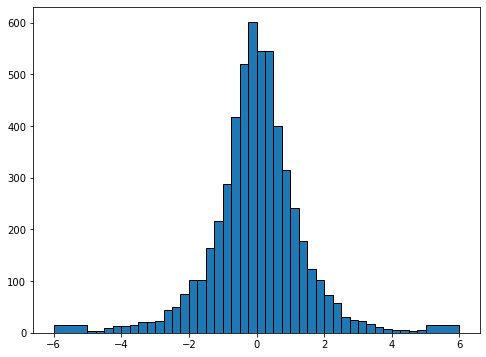

In [50]:
bins = [ -6, -5, -4.75, -4.5, -4.25, -4, -3.75, -3.5, -3.25, -3, -2.75, -2.5, -2.25, -2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 6 ]
plt.hist(nifty['return%'], bins=bins, edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

In [51]:
print('Number of days with daily return less than -5% =',(nifty['return%'].loc[nifty['return%'] < -5]).count())
print('Number of days with daily return more than  5% = ',(nifty['return%'].loc[nifty['return%'] > 5]).count())

Number of days with daily return less than -5% = 26
Number of days with daily return more than  5% =  27


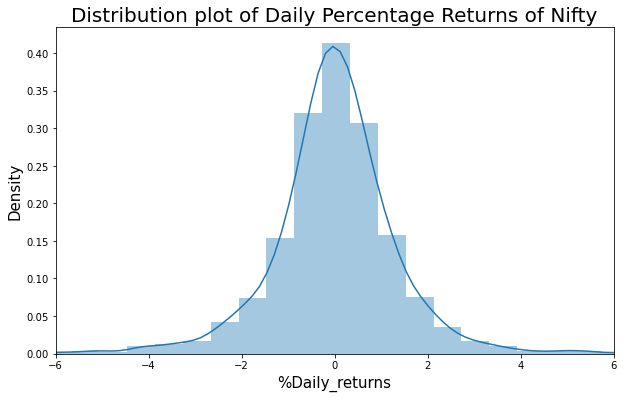

In [52]:
sns.distplot(nifty['return%'])
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlim(-6, 6)
plt.xlabel("%Daily_returns", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title('Distribution plot of Daily Percentage Returns of Nifty', fontsize=20)
plt.show()

In [53]:
std_pe = nifty['P/E'].std()
mean_pe = nifty['P/E'].mean()
df['standardized_PE'] = (nifty['P/E'] - mean_pe)/std_pe

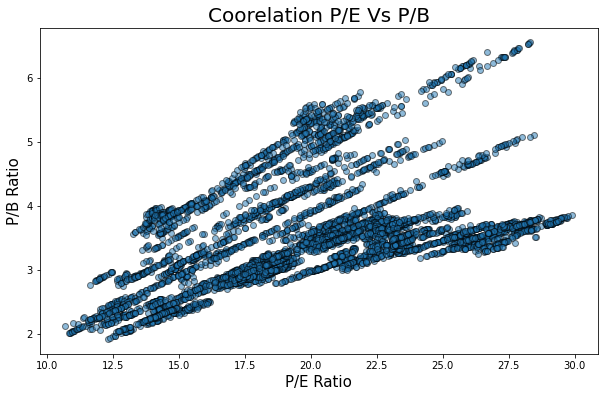

In [54]:
plt.scatter(nifty['P/E'], nifty['P/B'], edgecolor='black', alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Coorelation P/E Vs P/B', fontsize=20)
plt.xlabel('P/E Ratio', fontsize=15)
plt.ylabel('P/B Ratio', fontsize=15)
plt.show()

In [55]:
macro.head()

,Year,GNI per Capita USD at year end,% Change in GNI per capita in the year,USD INR Rate at year end,% Change in USD INR rate in the year,Inflation rate at year end,Value of 1 Rs.,% GDP growth rate,Unemployment Rate %,Change in Unemployment
0,1999,440.0000,7.3200,43.0600,4.3600,4.6700,1.0000,8.8500,5.6900,0.0500
1,2000,440.0000,0.0000,44.9400,4.3700,4.0100,1.0400,3.8400,5.6600,-0.0200
2,2001,450.0000,2.2700,47.1900,5.0100,3.7800,1.0800,4.8200,5.6600,0.0000
3,2002,460.0000,2.2200,48.6100,3.0100,4.3000,1.1300,3.8000,5.7200,0.0600
4,2003,520.0000,13.0400,46.5800,-4.1800,3.8100,1.1700,7.8600,5.7300,0.0100


In [56]:
yearlyNifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),P/E,P/B,Div Yield
0,1999-01-01,886.7500,892.2000,882.6000,890.8000,31356585.0000,807.2600,11.6200,2.0700,1.8300
1,1999-12-31,1485.6800,1548.9300,1479.4500,1536.3200,20032902.0000,897.5800,25.0000,4.4600,0.9800
2,2000-01-03,1482.1500,1592.9000,1482.1500,1592.2000,25358322.0000,884.1500,25.9100,4.6300,0.9500
3,2000-12-29,1249.0000,1265.9000,1242.2500,1263.5500,68269636.0000,2582.9000,19.2000,4.1400,1.2400
4,2001-01-01,1263.5000,1276.1500,1250.6500,1254.3000,60533274.0000,2054.0400,19.0600,4.1100,1.2500


In [57]:
change_pe = []
change_pb = []
change_divYield = []
returnPercent = []

for i in yearlyNifty.index:
    if i%2 == 1:
        change_pe.append(yearlyNifty['P/E'].iloc[i] - yearlyNifty['P/E'].iloc[i-1])
        change_pb.append(yearlyNifty['P/B'].iloc[i] - yearlyNifty['P/B'].iloc[i-1])
        change_divYield.append(yearlyNifty['Div Yield'].iloc[i] - yearlyNifty['Div Yield'].iloc[i-1])
        returnPercent.append((yearlyNifty['Close'].iloc[i] - yearlyNifty['Open'].iloc[i-1])/yearlyNifty['Open'].iloc[i-1])

In [58]:
macro['Change_PE'] = pd.DataFrame(change_pe)
macro['Change_PB'] = pd.DataFrame(change_pb)
macro['Change_DivYield'] = pd.DataFrame(change_divYield)
macro['ReturnPercent'] = (pd.DataFrame(returnPercent)*100).round(decimals=2)

In [59]:
macro

,Year,GNI per Capita USD at year end,% Change in GNI per capita in the year,USD INR Rate at year end,% Change in USD INR rate in the year,Inflation rate at year end,Value of 1 Rs.,% GDP growth rate,Unemployment Rate %,Change in Unemployment,Change_PE,Change_PB,Change_DivYield,ReturnPercent
0,1999,440.0000,7.3200,43.0600,4.3600,4.6700,1.0000,8.8500,5.6900,0.0500,13.3800,2.3900,-0.8500,73.2500
1,2000,440.0000,0.0000,44.9400,4.3700,4.0100,1.0400,3.8400,5.6600,-0.0200,-6.7100,-0.4900,0.2900,-14.7500
2,2001,450.0000,2.2700,47.1900,5.0100,3.7800,1.0800,4.8200,5.6600,0.0000,-3.7100,-1.7300,0.2300,-16.1800
3,2002,460.0000,2.2200,48.6100,3.0100,4.3000,1.1300,3.8000,5.7200,0.0600,-0.4600,0.0000,0.9300,3.2700
4,2003,520.0000,13.0400,46.5800,-4.1800,3.8100,1.1700,7.8600,5.7300,0.0100,5.8100,1.6400,-0.9100,71.8900
5,2004,610.0000,17.3100,45.3200,-2.7100,3.7700,1.2100,7.9200,5.6700,-0.0600,-5.7700,-0.5100,0.3900,10.6400
6,2005,710.0000,16.3900,44.1000,-2.6900,4.2500,1.2600,7.9200,5.6000,-0.0700,1.5900,0.7000,-0.3300,36.3700
7,2006,790.0000,11.2700,45.3100,2.7400,5.8000,1.3400,8.0600,5.4500,-0.1500,4.1000,0.7000,-0.3400,39.8200
8,2007,910.0000,15.1900,41.3500,-8.7400,6.3700,1.4200,7.6600,5.3200,-0.1300,6.2500,1.2900,-0.3700,54.6700
9,2008,1000.0000,9.8900,43.5100,5.2200,8.3500,1.5400,3.0900,5.2800,-0.0400,-14.6700,-3.9600,1.0700,-51.7800


<AxesSubplot:>

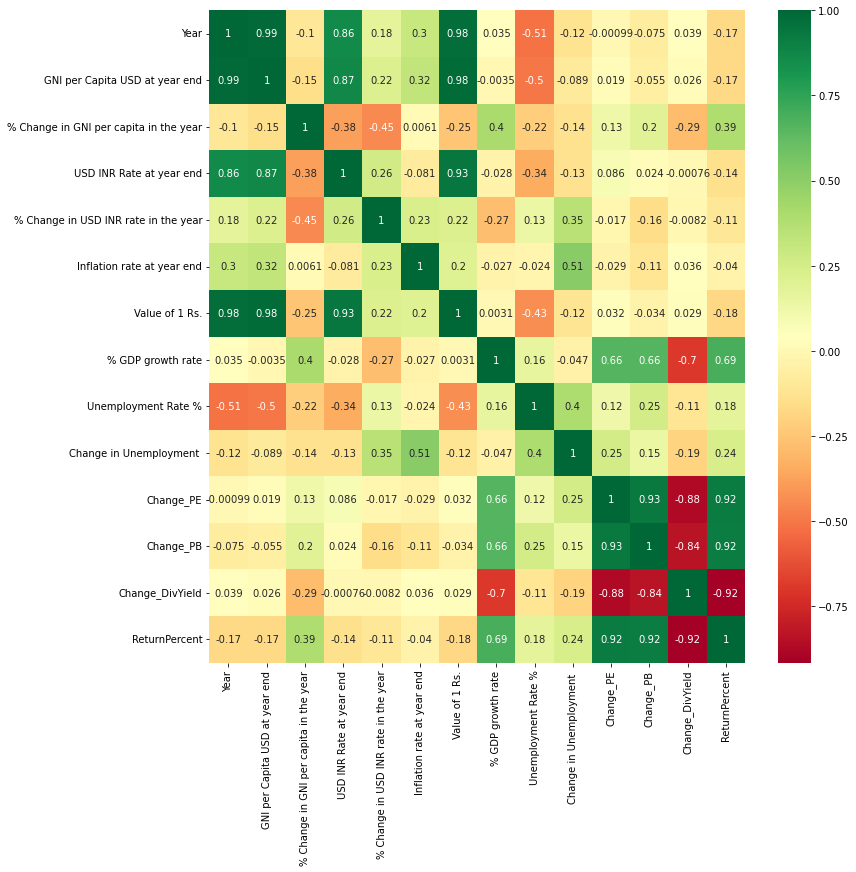

In [60]:
corrMatrix = macro.corr()
corrMatrixFeatures = corrMatrix.index
plt.figure(figsize=(12,12))
sns.heatmap(macro[corrMatrixFeatures].corr(), annot=True, cmap='RdYlGn')

In [61]:
corrMatrix

,Year,GNI per Capita USD at year end,% Change in GNI per capita in the year,USD INR Rate at year end,% Change in USD INR rate in the year,Inflation rate at year end,Value of 1 Rs.,% GDP growth rate,Unemployment Rate %,Change in Unemployment,Change_PE,Change_PB,Change_DivYield,ReturnPercent
Year,1.0000,0.9905,-0.1017,0.8580,0.1763,0.3022,0.9754,0.0348,-0.5126,-0.1243,-0.0010,-0.0751,0.0390,-0.1696
GNI per Capita USD at year end,0.9905,1.0000,-0.1482,0.8660,0.2210,0.3201,0.9834,-0.0035,-0.4979,-0.0890,0.0188,-0.0553,0.0261,-0.1691
% Change in GNI per capita in the year,-0.1017,-0.1482,1.0000,-0.3783,-0.4495,0.0061,-0.2540,0.4039,-0.2165,-0.1360,0.1310,0.1977,-0.2852,0.3878
USD INR Rate at year end,0.8580,0.8660,-0.3783,1.0000,0.2645,-0.0814,0.9346,-0.0282,-0.3417,-0.1333,0.0860,0.0237,-0.0008,-0.1425
% Change in USD INR rate in the year,0.1763,0.2210,-0.4495,0.2645,1.0000,0.2293,0.2216,-0.2734,0.1338,0.3525,-0.0170,-0.1564,-0.0082,-0.1064
Inflation rate at year end,0.3022,0.3201,0.0061,-0.0814,0.2293,1.0000,0.2001,-0.0272,-0.0243,0.5098,-0.0288,-0.1120,0.0360,-0.0396
Value of 1 Rs.,0.9754,0.9834,-0.2540,0.9346,0.2216,0.2001,1.0000,0.0031,-0.4342,-0.1156,0.0320,-0.0341,0.0295,-0.1811
% GDP growth rate,0.0348,-0.0035,0.4039,-0.0282,-0.2734,-0.0272,0.0031,1.0000,0.1578,-0.0468,0.6597,0.6595,-0.6967,0.6873
Unemployment Rate %,-0.5126,-0.4979,-0.2165,-0.3417,0.1338,-0.0243,-0.4342,0.1578,1.0000,0.3971,0.1180,0.2546,-0.1143,0.1759
Change in Unemployment,-0.1243,-0.0890,-0.1360,-0.1333,0.3525,0.5098,-0.1156,-0.0468,0.3971,1.0000,0.2528,0.1455,-0.1942,0.2411


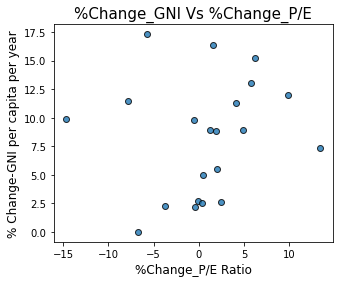

In [62]:
plt.scatter(macro['Change_PE'], macro['% Change in GNI per capita in the year'], edgecolor='black', alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(5, 4)
plt.title('%Change_GNI Vs %Change_P/E', fontsize=15)
plt.xlabel('%Change_P/E Ratio', fontsize=12)
plt.ylabel('% Change-GNI per capita per year', fontsize=12)
plt.show()

The inference from this chart is that when the %Change in GNI is high the absolute value of Change in PE is also high

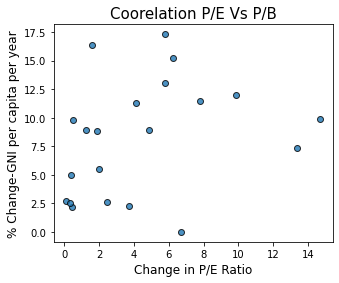

In [63]:
#abs(macro['Change_PE'])

plt.scatter(abs(macro['Change_PE']), abs(macro['% Change in GNI per capita in the year']), edgecolor='black', alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(5, 4)
plt.title('Coorelation P/E Vs P/B', fontsize=15)
plt.xlabel('Change in P/E Ratio', fontsize=12)
plt.ylabel('% Change-GNI per capita per year', fontsize=12)
plt.show()

In [64]:
(abs(macro[['Change_PE', '% Change in GNI per capita in the year']])).corr()

,Change_PE,% Change in GNI per capita in the year
Change_PE,1.0000,0.2923
% Change in GNI per capita in the year,0.2923,1.0000


# Time Series Analysis

In [65]:
def QQ_dist_subplot(df):
    plt.figure(figsize=(10,4))
    ax = plt.subplot(1,2,1)
    sns.distplot(df)
    plt.ylabel("Density")
    
    plt.subplot(1,2,2)
    result = scipy.stats.probplot(df, plot=pylab)
    plt.tight_layout()
    plt.show()

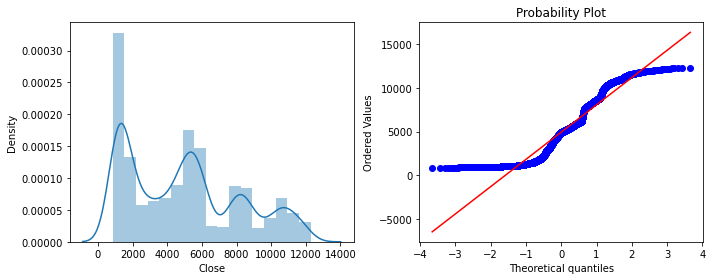

In [66]:
QQ_dist_subplot(nifty['Close'])

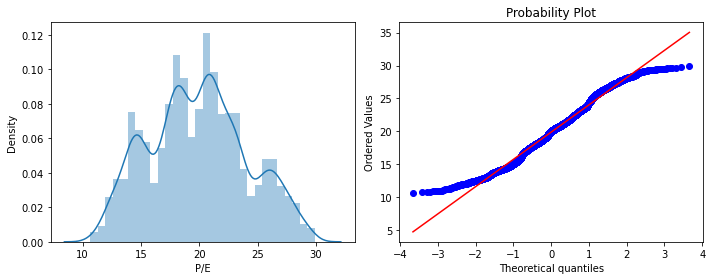

In [67]:
QQ_dist_subplot(nifty['P/E'])

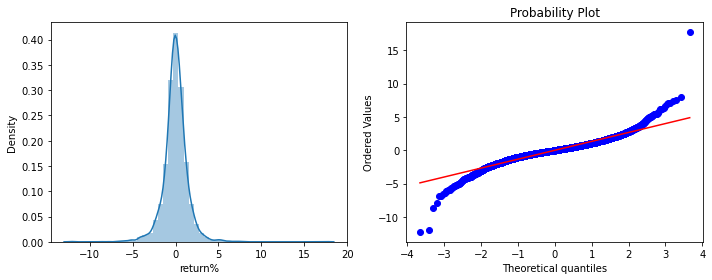

In [68]:
QQ_dist_subplot(nifty['return%'])

### Train Test Split

<p style="color:#FF4500; font-size:16px"> - For Time Series Analysis when using the entire data for 21 years the results were not very convincing
<br>
- This could be because a time horizon of 21 years is very long to have a stationary and consistent data
<br>
- Hence for Time Series Analysis last 5 years data is considered i.e from year 2016
</p> 

In [69]:
nifty_new = nifty[3131:]
train_size = .80
size = int(len(nifty_new)*train_size)
nifty_train = nifty_new.iloc[:size]
nifty_test = nifty_new.iloc[size:]

In [70]:
print(f'Length of entire dataset: {len(nifty)}')
print(f'Length of dataset used for Time Series Analysis: {len(nifty_new)}')
print(f'Length of train set: {len(nifty_train)}')
print(f'Length of test set: {len(nifty_test)}')

Length of entire dataset: 5478
Length of dataset used for Time Series Analysis: 2347
Length of train set: 1877
Length of test set: 470


### Augmented Dickey Fuller

<p style="color:#FF4500; font-size:16px"> - Augmented Dickey Fuller Test is a statistical-sinificance test which checks for stationarity of data
<br>
- The null hypothesis of this test is that unit root is present in time series hence non stationary
<br>
- The alternate hypothesis is stationarity
- Depending on the test statistic obtained and the level of significance required we either reject the null hypothesis or fail to reject
</p> 

In [71]:
#Import adfuller method from statsmodels
from statsmodels.tsa.stattools import adfuller 

In [72]:
res = adfuller(nifty_train.Close)
print("The ADF test for nifty['Close'] is \n")
ls = ['Test Statistic', 'P-value', 'Used Lag', 'No. Observations used', 'Critical Values', 'Maximum Information Criteria'] 
j = 0
for i in res[:5]:
    print(f'{ls[j]}: {i}')
    j = j+1

The ADF test for nifty['Close'] is 

Test Statistic: -0.039415482703654796
P-value: 0.9551485135769118
Used Lag: 1
No. Observations used: 1875
Critical Values: {'1%': -3.433842413401391, '5%': -2.8630827037453277, '10%': -2.5675912790044446}


<p style="color:#FF4500; font-size:16px"> - Clearly we can see that obtained the test statistics is greater than the p values of all critical levels of 1%, 5%, 10%
<br>
- Hence we will accept the null hypothesis and this would mean that unit root is present
<br>
- The conclusion from this is that nifty[Close] data is non-stationary
</p> 

In [73]:
res = adfuller(nifty_train['P/E'])
print("The ADF test for nifty['P/E'] is \n")
ls = ['Test statistic', 'P-value', 'Used Lag', 'No. Observations used', 'Critical Values', 'Maximum Information Criteria'] 
j = 0
for i in res[:5]:
    print(f'{ls[j]}: {i}')
    j = j+1

The ADF test for nifty['P/E'] is 

Test statistic: -1.5824743222538071
P-value: 0.4923909814736743
Used Lag: 1
No. Observations used: 1875
Critical Values: {'1%': -3.433842413401391, '5%': -2.8630827037453277, '10%': -2.5675912790044446}


<p style="color:#FF4500; font-size:16px"> - Here we can see that test statistic obtained is less than the p values of all critical levels of 1%, 5%, 10%
<br>
- Hence we will comfortably reject the null hypothesis
<br>
- The conclusion from this is that nifty[P/E] data is stationary
</p> 

In [74]:
res = adfuller(nifty_train['return%'])
print("The ADF test for nifty['return%'] is \n")
ls = ['Test Statistic', 'P-value', 'Used Lag', 'No. Observations used', 'Critical Values', 'Maximum Information Criteria'] 
j = 0
for i in res[:5]:
    print(f'{ls[j]}: {i}')
    j = j+1

The ADF test for nifty['return%'] is 

Test Statistic: -14.373083481826578
P-value: 9.422490359544922e-27
Used Lag: 9
No. Observations used: 1867
Critical Values: {'1%': -3.43385739886599, '5%': -2.8630893193874067, '10%': -2.5675948015815524}


<p style="color:#FF4500; font-size:16px"> - Here we can see that test statistics obtained is less than the p values of all critical levels of 1%, 5%, 10%
<br>
- Hence we will comfortably reject the null hypothesis
<br>
- The conclusion from this is that nifty[return] data is stationary
</p> 

### Seasonal Decomposition

<p style="color:#FF4500; font-size:16px"> - Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every finite interval
<br>
- Seasonality can be understood by Seasonal Decomposition which means splitting the data into 3 effects <strong>trends, seasonal, residual</strong>
</p> 

In [75]:
#Import seasonal_decompose from statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose 

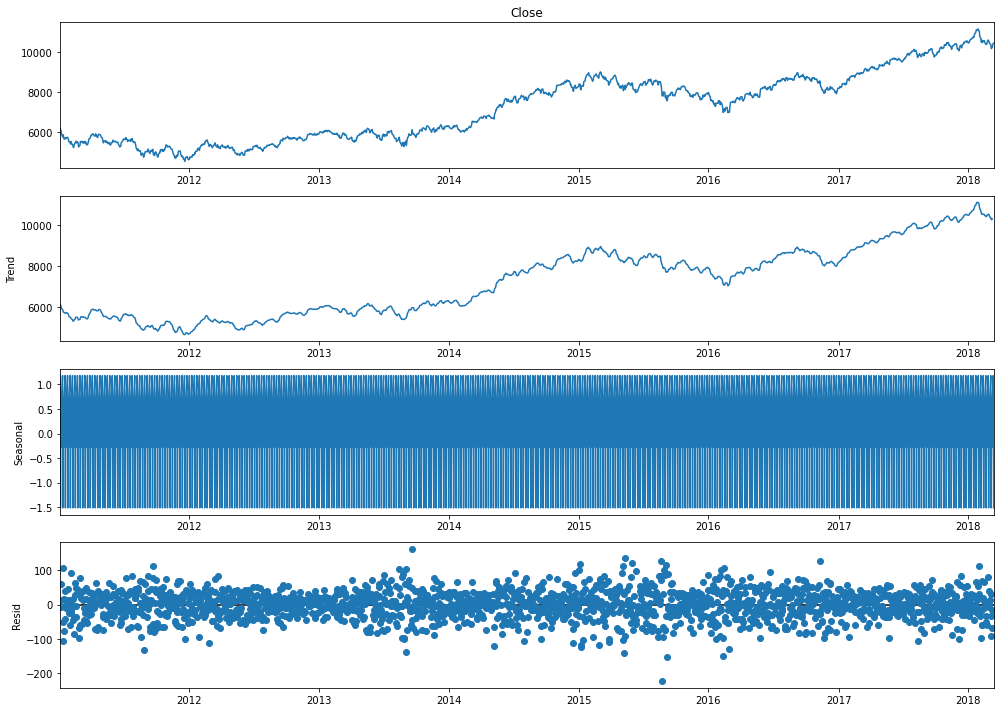

In [76]:
season_decomposition_additive = seasonal_decompose(nifty_train['Close'], model='additive')
fig = season_decomposition_additive.plot()
fig.set_size_inches(14, 10)
fig.tight_layout()
plt.show()

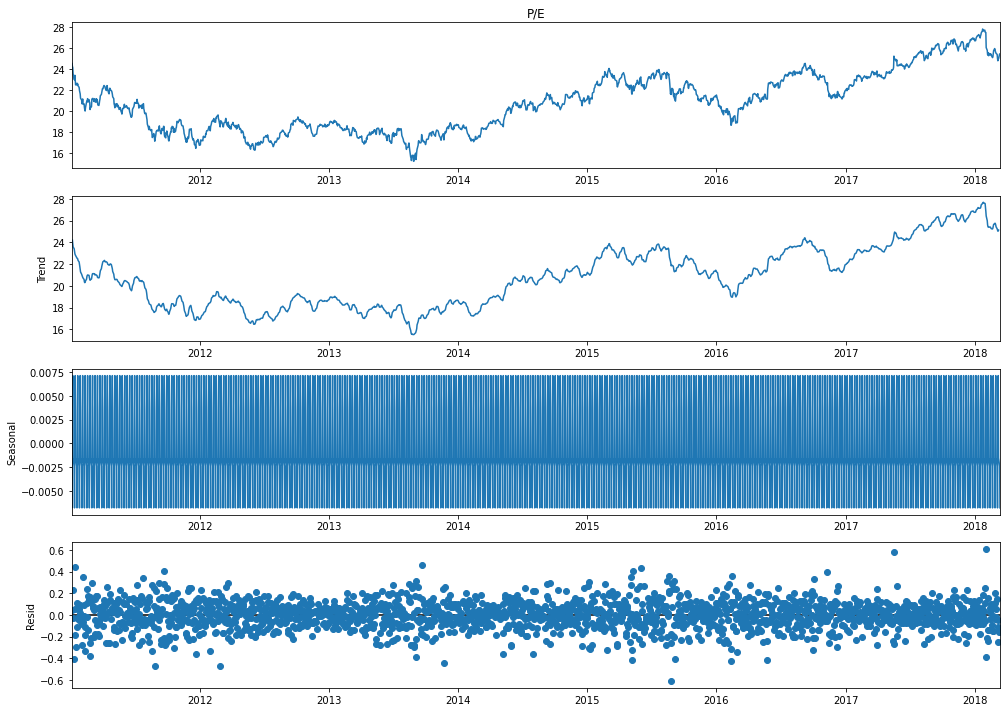

In [77]:
season_decomposition_additive = seasonal_decompose(nifty_train['P/E'], model='additive')
fig = season_decomposition_additive.plot()
fig.set_size_inches(14, 10)
fig.tight_layout()
plt.show()

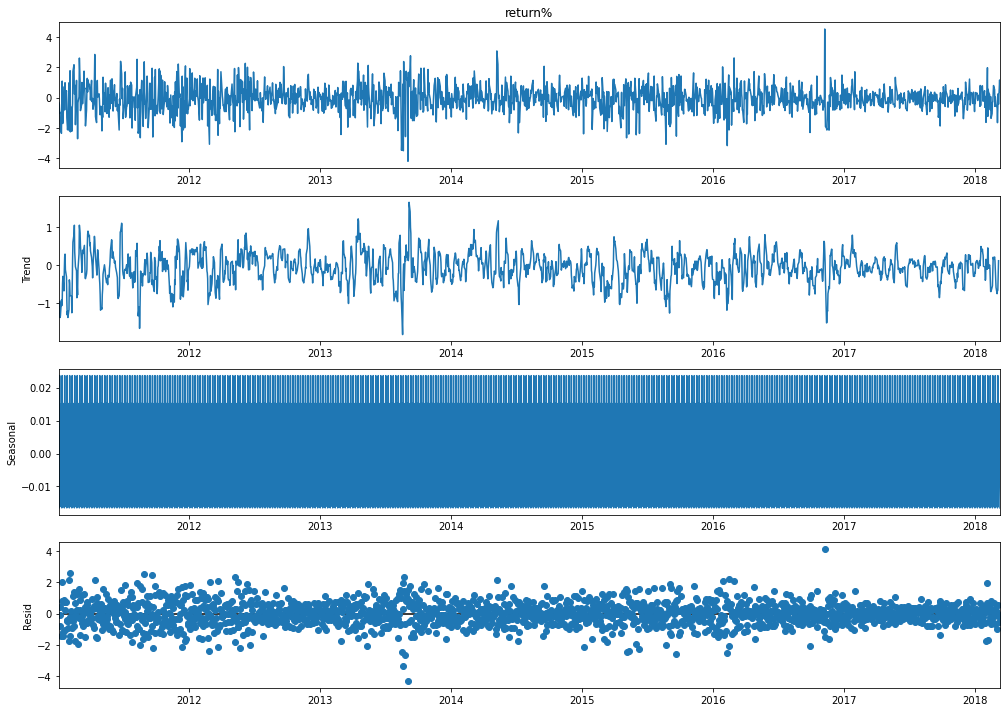

In [78]:
season_decomposition_additive = seasonal_decompose(nifty_train['return%'], model='additive')
fig = season_decomposition_additive.plot()
fig.set_size_inches(14, 10)
fig.tight_layout()
plt.show()

### AutoCorrelation Function (ACF)

<p style="color:#FF4500; font-size:16px"> - Autocorrelation captures the direct and indirect effect
<br>
- Partial autocorrelation only captures the direct effect of the lagged values
</p> 


In [79]:
# Importing the method that plots the ACF function and PACF function
import statsmodels.graphics.tsaplots as sgt

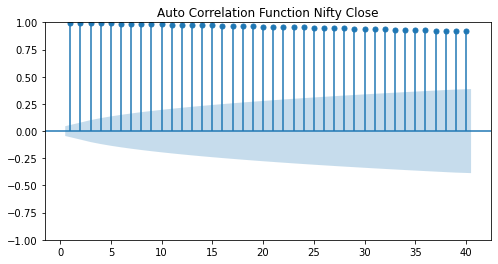

In [80]:
sgt.plot_acf(nifty_train['Close'], lags=40, zero=False)
plt.title('Auto Correlation Function Nifty Close')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()

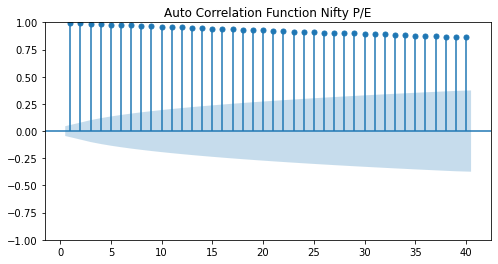

In [81]:
sgt.plot_acf(nifty_train['P/E'], lags=40, zero=False)
plt.title('Auto Correlation Function Nifty P/E')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()

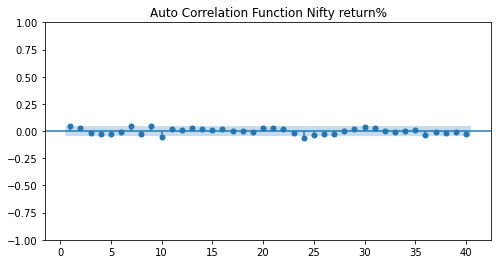

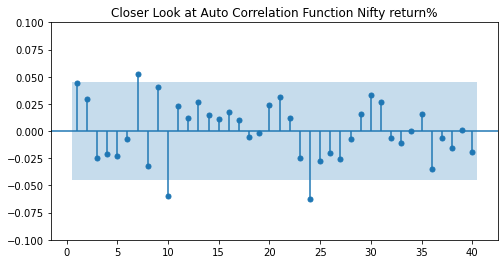

In [82]:
sgt.plot_acf(nifty_train['return%'], lags=40, zero=False)
plt.title('Auto Correlation Function Nifty return%')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()

sgt.plot_pacf(nifty_train['return%'], lags=40, zero=False)
plt.title('Closer Look at Auto Correlation Function Nifty return%')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.1, .1)
plt.show()

### Partial AutoCorrelation Function (PACF)

In [83]:
import statsmodels.graphics.tsaplots as sgt

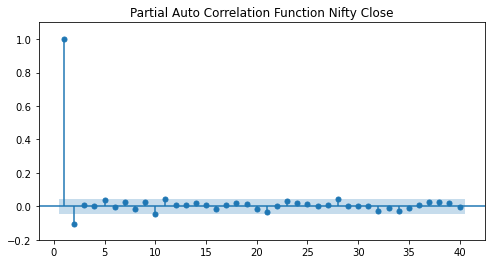

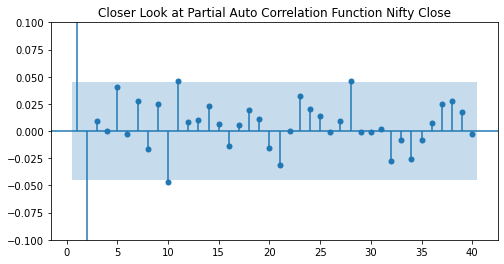

In [84]:
sgt.plot_pacf(nifty_train['Close'], lags=40, zero=False, method=('ols'))
plt.title('Partial Auto Correlation Function Nifty Close')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.2, 1.1)
plt.show()

sgt.plot_pacf(nifty_train['Close'], lags=40, zero=False, method=('ols'))
plt.title('Closer Look at Partial Auto Correlation Function Nifty Close')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.1, .1)
plt.show()

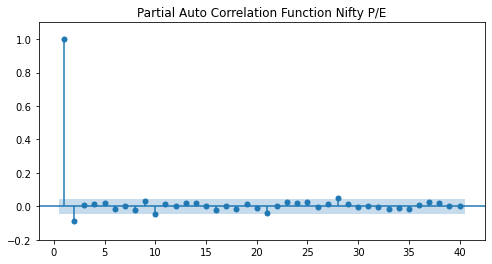

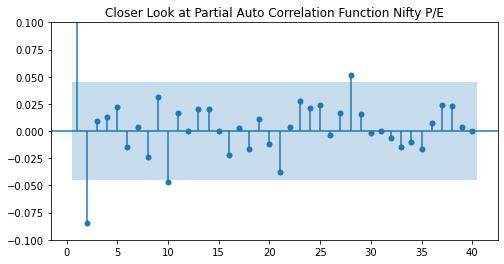

In [85]:
sgt.plot_pacf(nifty_train['P/E'], lags=40, zero=False, method=('ols'))
plt.title('Partial Auto Correlation Function Nifty P/E')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.2, 1.1)
plt.show()

sgt.plot_pacf(nifty_train['P/E'], lags=40, zero=False, method=('ols'))
plt.title('Closer Look at Partial Auto Correlation Function Nifty P/E')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.1, .1)
plt.show()

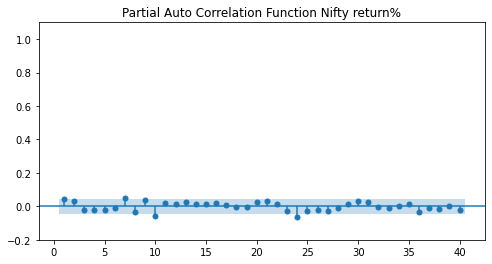

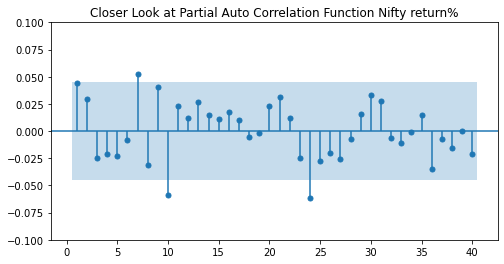

In [86]:
sgt.plot_pacf(nifty_train['return%'], lags=40, zero=False, method=('ols'))
plt.title('Partial Auto Correlation Function Nifty return%')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.2, 1.1)
plt.show()

sgt.plot_pacf(nifty_train['return%'], lags=40, zero=False, method=('ols'))
plt.title('Closer Look at Partial Auto Correlation Function Nifty return%')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.ylim(-.1, .1)
plt.show()

### AutoRegressive Model

<p style="color:#FF4500; font-size:16px"> - An autoregressive (AR) model predicts future behavior based on past behavior
<br>
- It’s used for forecasting when there is some correlation between values and the lagged values
<br>
- The process is basically a linear regression of the data in the current series against one or more past values in the same series
</p> 


### *Currently working on implementation of AR, MA, and ARMA model. There is some error that is causing predictions vary by a very wide margin from the test data. Currently working on improving the implementation of Time series models*